In [ ]:
# initial setup
try:
    # settings colab:
    import google.colab

    # si usan colab, deben cambiar el token de esta url
    ! mkdir -p ../Data
    # los que usan colab deben modificar el token de esta url:
    ! wget -O ../Data/melb_data.csv "https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_students_2020/master/M2/CLASE_06_Visualizacion_1/Data/melb_data.csv?token=AA4GFHPZ7S7NV7T7GEMC7KC6VMWSQ"
    
except ModuleNotFoundError:    
    # settings local:
    %run "../../../common/0_notebooks_base_setup.py"

---

<img src='../../../common/logo_DH.png' align='left' width=35%/>


En esta parte vimos dos bibliotecas muy usadas para visualizaciones en python, que son matplotlib y seaborn.

https://matplotlib.org/

https://seaborn.pydata.org/index.html

En este curso vamos a usar herramientas de visualización prinicipalmente para análisis exploratorio de datos.

La idea de esta práctica es ejercitar algunos gráficos de seaborn que vamos a volver a usar en la clase presencial.

Usaremos el dataset con las propiedades inmobiliarias en Melbourne, que ya conocemos de la práctica de Limpieza de Datos.


## Dataset

https://www.kaggle.com/dansbecker/melbourne-housing-snapshot

El dataset que usaremos en esta parte, del 2017, está construido con los datos que se publicaron cada semana en https://www.domain.com.au/ 

Los datos incluyen dirección, tipo de inmueble, barrio, método de venta, habitaciones, precio, agente inmobiliario, fecha de venta y distancia a CBD (Central Business District).

Los campos que incluye son:

**Rooms**: cantidad de habitaciones

**Price**: precio en dolares

**Method**: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.

**Type**: br - bedroom(s); h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.

**SellerG**: agente inmobiliario

**Date**: fecha de venta

**Distance**: distancia a CBD

**Regionname**: región (West, North West, North, North east …etc)

**Propertycount**: cantidad de inmuebles que existen en ese suburbio.

**Bedroom2** : Scraped # habitaciones (de distintas fuentes)

**Bathroom**: cantidad de baños

**Car**: cantidad de carspots

**Landsize**: superficie

**BuildingArea**: tamaño del edificio

**CouncilArea**: municipio



### Ejercicio 1: Leemos los datos

Importar el archivo melb_data.csv e inspeccionar los primeros casos y los tipos de datos.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data_location = "../Data/melb_data.csv"

data = pd.read_csv(data_location)

data.head(3)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0


In [3]:
data.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

### Ejercicio 2: boxplot

Vamos usar un boxplot para ver la distribución de valores de la columna Rooms para cinco valores de Suburb (Reservoir, Richmond, Bentleigh East, Preston, Brunswick)

https://seaborn.pydata.org/generated/seaborn.boxplot.html

Usaremos 

* x: Suburb

* y: Rooms

* palette: ["lightblue", "pink", "yellow", "green", "orange"]

* data: el dataset filtrado por los valores de Suburb de interés


In [4]:
suburb_values = ['Reservoir', 'Richmond', 'Bentleigh East', 'Preston', 'Brunswick']

data_suburb_mask = data.Suburb.apply(lambda x: x in suburb_values)

data_suburb = data.loc[data_suburb_mask, :]

palette_suburb = ["lightblue", "pink", "yellow", "green", "orange"]

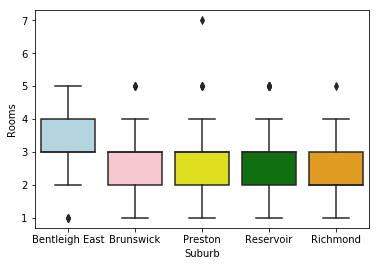

In [5]:
sns.boxplot("Suburb", "Rooms", data=data_suburb, palette = palette_suburb)

### Ejercicio 3: violinplot

Vamos usar un violinplot para ver la distribución de valores de la columna Car para los cinco valores de Suburb del ejercicio anterior (Reservoir, Richmond, Bentleigh East, Preston, Brunswick)

https://seaborn.pydata.org/generated/seaborn.violinplot.html

Usaremos 

* x: Suburb

* y: Rooms

* palette: ["lightblue", "pink", "yellow", "green", "orange"]

* data: el dataset filtrado por los valores de Suburb de interés
     

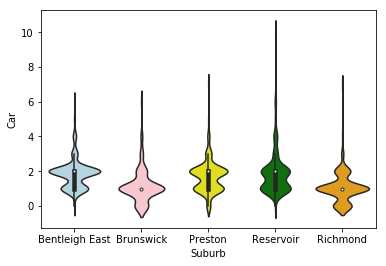

In [6]:
sns.violinplot("Suburb", "Car", data=data_suburb, palette = palette_suburb)

### Ejercicio 4: PairGrid

https://seaborn.pydata.org/generated/seaborn.PairGrid.html

Veamos ahora si existe alguna correlación entre los valores de las columnas Car, Rooms, Distance, Landsize, Price para los valores de Suburb del ejercicio anterior (Reservoir, Richmond, Bentleigh East, Preston, Brunswick)

Usemos para eso `PairGrid`.

¿Qué conclusiones podemos sacar de estos gráficos?

Paletas: 
https://seaborn.pydata.org/tutorial/color_palettes.html

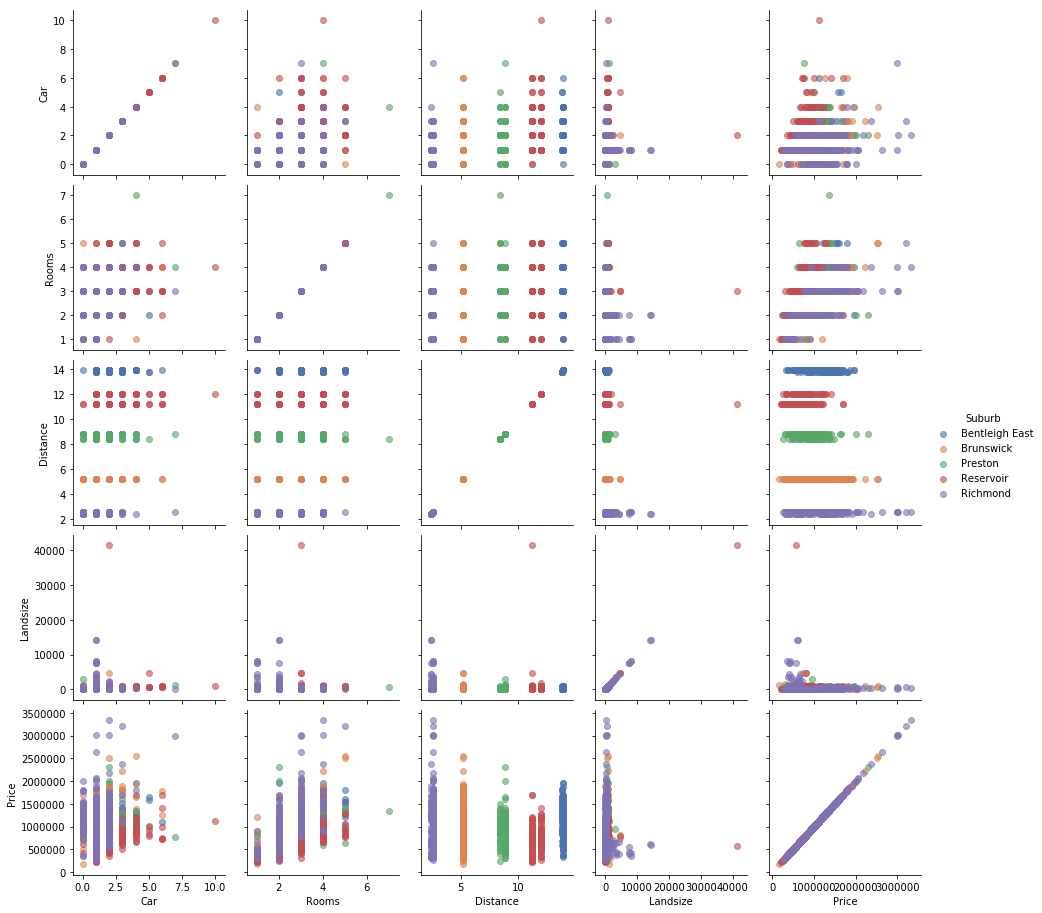

In [14]:
g = sns.PairGrid(data_suburb, vars=['Car', 'Rooms', 'Distance', 'Landsize', 'Price'],
                 hue='Suburb', palette='deep')
#g = sns.PairGrid(data_suburb, vars=['Car', 'Rooms', 'Distance', 'Landsize', 'Price'],
#                 hue='Suburb', palette=palette_suburb)
g.map(plt.scatter, alpha=0.6)
g.add_legend();

### Ejercicio 5: distplot

El campo Type toma valores

h: house, cottage, villa, semi,terrace; 

u: unit, duplex;

t: townhouse

https://seaborn.pydata.org/generated/seaborn.distplot.html

Veamos cómo se ditribuye la variable Price para cada uno de los tipos de inmueble h, u, t.

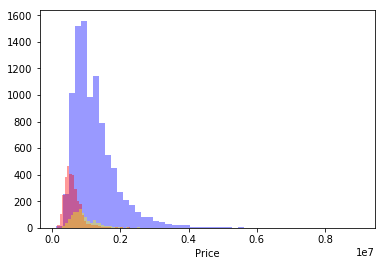

In [8]:
data_type_h_mask = data.Type == "h"
data_type_h = data.loc[data_type_h_mask, :]

data_type_u_mask = data.Type == "u"
data_type_u = data.loc[data_type_u_mask, :]

data_type_t_mask = data.Type == "t"
data_type_t = data.loc[data_type_t_mask, :]

#kde=True dibuja gaussian kernel density estimate

sns.distplot(data_type_h.Price, kde=False, color = "blue");
sns.distplot(data_type_u.Price, kde=False, color = "red");
sns.distplot(data_type_t.Price, kde=False, color = "yellow");


### Ejercicio 6: joinplot

Veamos a filtrar los imuebles por su valor en el campo Price.

Nos vamos a quedar con los que valen hasta 5 millones (0.5E7) y graficaremos la relación entre los campos Price y Propertycount usando un jointplot.

https://seaborn.pydata.org/generated/seaborn.jointplot.html

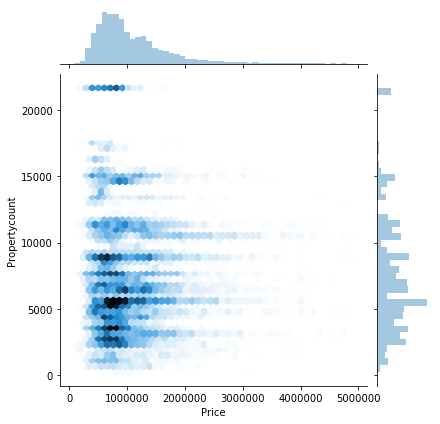

In [9]:
data_max_05_mask = data.Price <= 0.5E7
data_max_05 = data.loc[data_max_05_mask, :]
g = sns.jointplot("Price", "Propertycount", data_max_05, kind='hex')

### Adicional

Revisemos algunos de los ejemplos de gráficos que están en este link

https://python-graph-gallery.com/

Miremos los ejemplos de código de 

* boxplot http://python-graph-gallery.com/boxplot/

* scatterplot http://python-graph-gallery.com/scatter-plot/

* violin https://python-graph-gallery.com/violin-plot/

* seaborn https://python-graph-gallery.com/seaborn/

* matplotlib https://python-graph-gallery.com/matplotlib/

